In [57]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [58]:
# load the data
df = pd.read_csv("C:/Users/Tanmoy/Desktop/Projects/Sales Prediction/advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [59]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [60]:
df.shape

(200, 4)

In [61]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

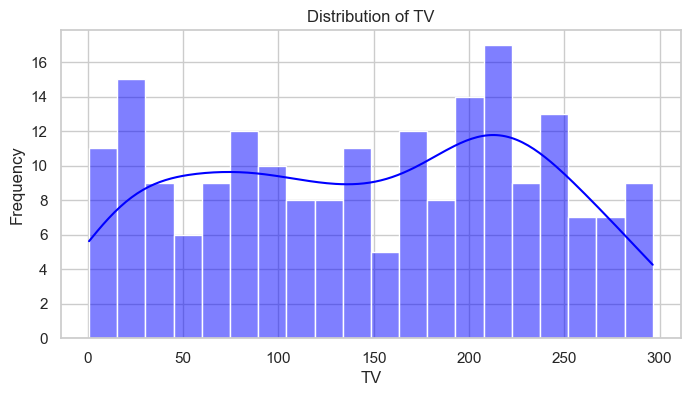

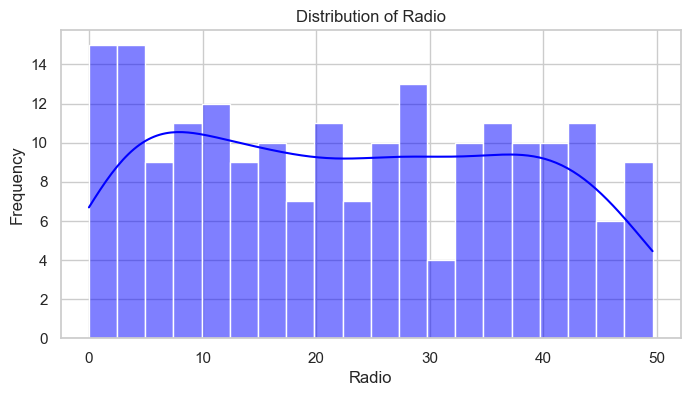

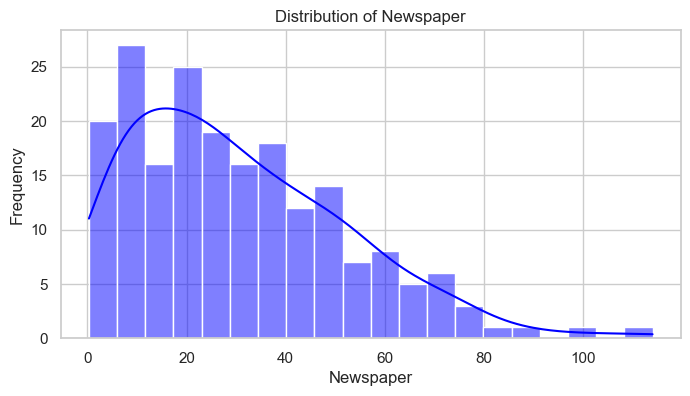

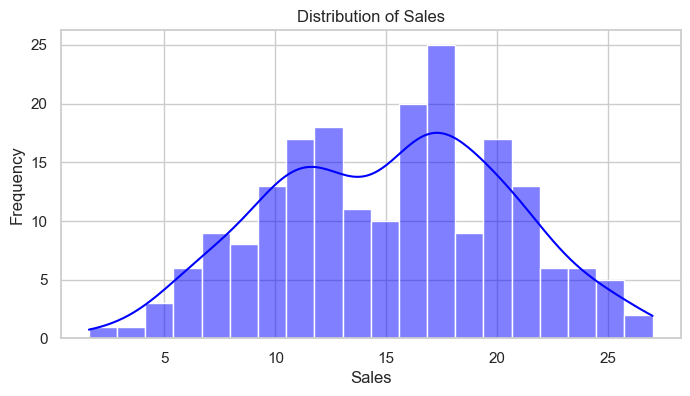

In [62]:
# set the style for Seaborn plots
sns.set(style="whitegrid")
features = ['TV', 'Radio', 'Newspaper', 'Sales']
# create subplots for each feature
for feature in features:
    plt.figure(figsize=(8, 4)) 
    plt.title(f'Distribution of {feature}')
    
    # Use a histogram to visualize the distribution
    sns.histplot(df[feature], kde=True, bins=20, color='blue')
    
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [63]:
correlation_tv = df['TV'].corr(df['Sales'])
correlation_radio = df['Radio'].corr(df['Sales'])
correlation_newspaper = df['Newspaper'].corr(df['Sales'])

strongest_channel = max(
    [('TV',abs(correlation_tv)), ('Radio', abs(correlation_radio)), ('Newspaper', abs(correlation_newspaper))],
    key= lambda x: x[1]
)
print(f"The channel with the strongest impact on Sales is{strongest_channel}")

The channel with the strongest impact on Sales is('TV', 0.9012079133023305)


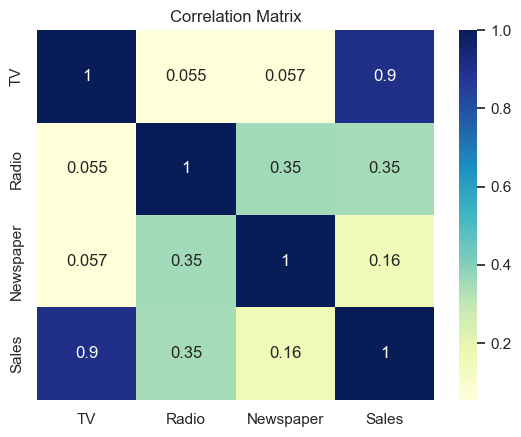

In [64]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')#annot show relation
plt.title('Correlation Matrix')
plt.show()

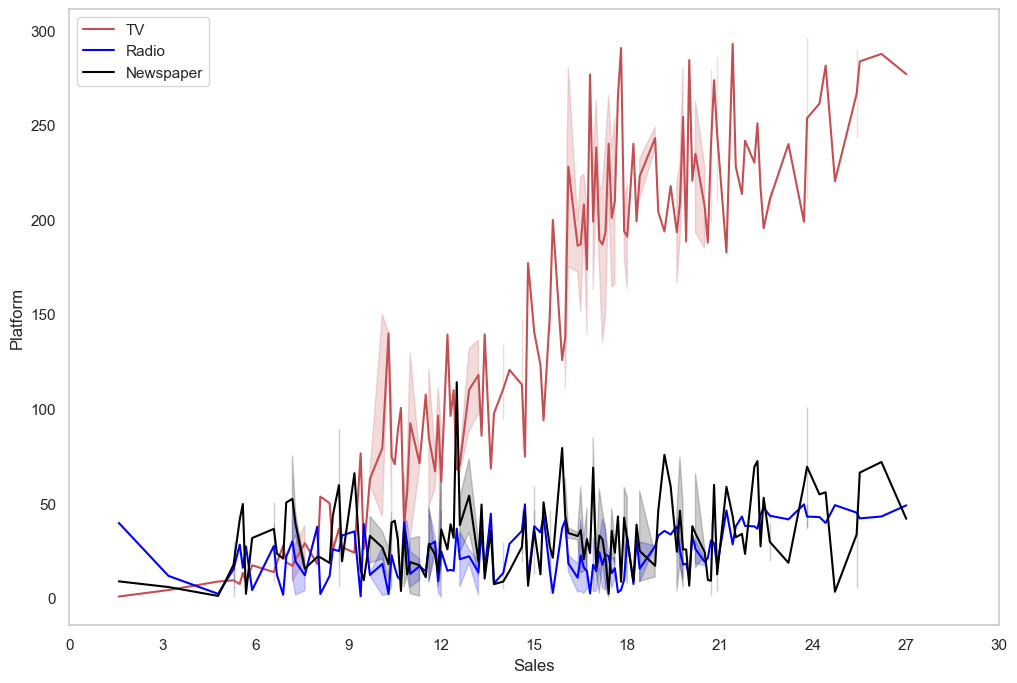

In [65]:
plt.figure(figsize=(12,8))

sns.lineplot(x='Sales',y='TV',data=df,color='r',label='TV')
sns.lineplot(x='Sales',y='Radio',data=df,color='blue',label='Radio')
sns.lineplot(x='Sales',y='Newspaper',data=df,color='black',label='Newspaper')
plt.xlabel('Sales')
plt.xticks(np.arange(0,33,3))
plt.ylabel('Platform')

plt.grid()
plt.show()

In [66]:
df['Total spent'] = df['TV']+ df['Newspaper'] + df['Radio']
df

,TV,Radio,Newspaper,Sales,Total spent
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,14.0,107.2
197,177.0,9.3,6.4,14.8,192.7
198,283.6,42.0,66.2,25.5,391.8


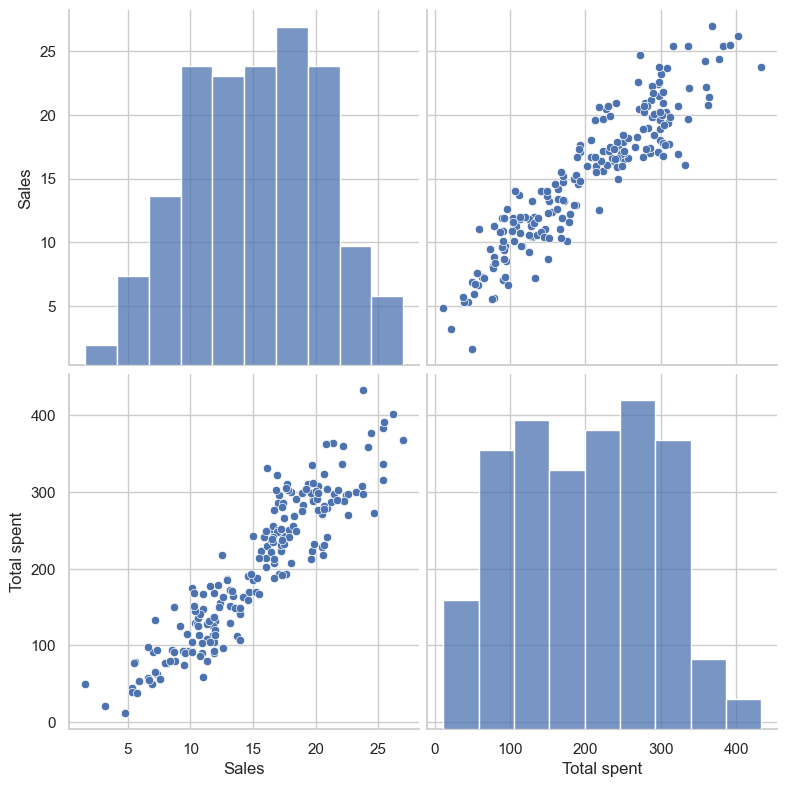

In [67]:
# create a pair plot
pairplot_data = df[['Sales', 'Total spent']]
sns.set(style="whitegrid")
sns.pairplot(pairplot_data, height=4)
plt.show()

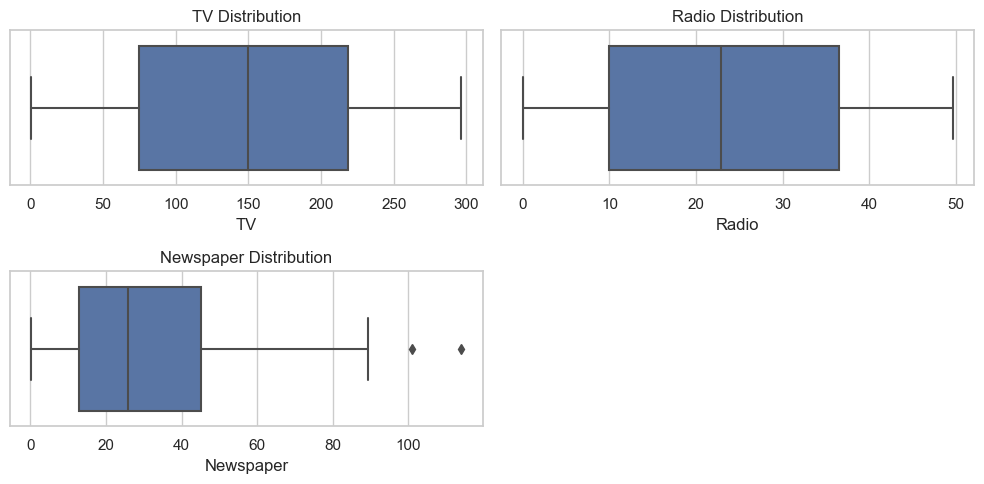

In [68]:
cols = ['TV', 'Radio','Newspaper']

# function to remove outliers
def remove_outliers(df, columns,threshold =10):

    df_cleaned = df.copy()
    for column in columns:

         z_scores = (df[column]- df[column].mean())/df[column].std()
         outliers = df_cleaned.loc[abs(z_scores)> threshold]
         df_cleaned = df_cleaned.drop(outliers.index)
    return df_cleaned
df = remove_outliers(df,cols)

# plot box plots for the cleaned DataFrame
plt.figure(figsize=(10, 5))
for i, column in enumerate(cols):
    plt.subplot(len(cols)//2 + len(cols)%2, 2, i+1)
    sns.boxplot(data=df, x=column)
    plt.title(f"{column} Distribution")
plt.tight_layout()
plt.show()

In [69]:
# Model Preparation
X=df.drop(columns='Sales')
Y=df['Sales']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

In [70]:
# Linear Regression Model
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [71]:
# make predictions
prediction=model.predict(X_test)
prediction

array([17.94221632, 11.28731032, 19.36406753, 15.25309499,  8.85035488,
       11.08345095, 24.54827272, 10.72184726, 18.64190205, 17.03877174,
       14.71887065, 13.30204368, 19.10529921, 11.4654086 , 13.82417942,
       14.56139355, 16.86156735, 17.27369971, 17.78634747, 21.28201581,
       19.1397699 , 11.05346066,  9.93276334, 11.49854807,  8.5309559 ,
       13.26073545, 21.75566382, 16.96066432, 24.25791572, 11.92392893,
       16.40376866, 21.96064207,  9.51770237, 10.16209996, 10.08141197,
       10.45644324, 15.54919097,  9.92133897, 13.83425453, 12.54320065,
       14.5093965 , 12.61758414,  6.46804914, 20.25656292, 23.16303373,
       24.65508581, 15.20817964,  9.27513655, 18.72004324, 18.16217728,
       12.73063894, 16.65175796, 15.79776032,  8.36188762, 21.22771856,
        9.52094834, 23.88078008, 23.29062902, 19.6930198 , 16.76467522])

In [72]:
model.intercept_

5.022730805826271

In [73]:
model.coef_

array([ 0.01279515,  0.06728523, -0.04064098,  0.0394394 ])

In [74]:
accuracy_score=model.score(X_test,Y_test)*100
print(f"Accuracy of model: {accuracy_score}%")

Accuracy of model: 88.77675297095176%
